In [4]:
import pandas as pd
import numpy as np 

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos
import pickle# use to dump model 
import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [5]:
phish_data  = pd.read_csv(r"D:\degree\sem 6\mini\url\botnet project\botnet project\phishing_site_urls.csv")

In [6]:
phish_data.head()

,URL,Label
0,wwww.gmail.com,bad
1,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
2,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
3,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
4,mail.printakid.com/www.online.americanexpress....,bad


In [7]:
phish_data.tail()

,URL,Label
549342,23.227.196.215/,bad
549343,apple-checker.org/,bad
549344,apple-iclods.org/,bad
549345,apple-uptoday.org/,bad
549346,apple-search.info,bad


In [8]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549347 entries, 0 to 549346
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549347 non-null  object
 1   Label   549347 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [9]:
phish_data.isnull().sum() # there is no missing valuess/checking missing value 

URL      0
Label    0
dtype: int64

In [10]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())
print(label_counts)

        count
Label        
good   392924
bad    156423


In [11]:
print(label_counts.columns)


Index(['count'], dtype='object')


In [12]:
#visualizing target_col
import plotly.express as px

# Assuming label_counts is your DataFrame
fig = px.bar(label_counts, x=label_counts.index, y='count')
fig.show()


In [13]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only


In [14]:
phish_data.URL[0]

'wwww.gmail.com'

In [15]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['wwww', 'gmail', 'com']

In [16]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 1.934527000063099 sec


In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized
257507,web.minorleaguebaseball.com/milb/stats/stats.j...,good,"[web, minorleaguebaseball, com, milb, stats, s..."
512036,spartech.pl/74t3nf4gv4,bad,"[spartech, pl, t, nf, gv]"
193145,genforum.genealogy.com/perrault/all.html,good,"[genforum, genealogy, com, perrault, all, html]"
324842,examiner.com/ksjo-in-san-jose,good,"[examiner, com, ksjo, in, san, jose]"
436257,spoke.com/info/pNm5jh/DavidFarr,good,"[spoke, com, info, pNm, jh, DavidFarr]"


In [18]:
stemmer = SnowballStemmer("english") # choose a language

In [19]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 23.676313400035724 sec


In [20]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
17082,asm-limited.co.uk/wp-content/themes/skyfall/33...,bad,"[asm, limited, co, uk, wp, content, themes, sk...","[asm, limit, co, uk, wp, content, theme, skyfal]"
224518,otday.wordpress.com/page/14/,good,"[otday, wordpress, com, page]","[otday, wordpress, com, page]"
374882,linkedin.com/directory/people/deschaine.html,good,"[linkedin, com, directory, people, deschaine, ...","[linkedin, com, directori, peopl, deschain, html]"
291848,biomedexperts.com/Profile.bme/1277625/Jacques_...,good,"[biomedexperts, com, Profile, bme, Jacques, S,...","[biomedexpert, com, profil, bme, jacqu, s, c, ..."
44574,armidolf.net/KXgbf8OPLMo/webscrprim.php?YXJtaW...,bad,"[armidolf, net, KXgbf, OPLMo, webscrprim, php,...","[armidolf, net, kxgbf, oplmo, webscrprim, php,..."


In [21]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.22172660008072853 sec


In [22]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
418156,publicrecords.com/people-search-records/barbar...,good,"[publicrecords, com, people, search, records, ...","[publicrecord, com, peopl, search, record, bar...",publicrecord com peopl search record barbara pott
202405,japanarchive.com/,good,"[japanarchive, com]","[japanarch, com]",japanarch com
252793,uk.linkedin.com/in/jrobinsondesigner,good,"[uk, linkedin, com, in, jrobinsondesigner]","[uk, linkedin, com, in, jrobinsondesign]",uk linkedin com in jrobinsondesign
434823,speakuptoday.net/,good,"[speakuptoday, net]","[speakuptoday, net]",speakuptoday net
369693,labome.org/expert/usa/wayne/dore-duffy/paula-d...,good,"[labome, org, expert, usa, wayne, dore, duffy,...","[labom, org, expert, usa, wayn, dore, duffi, p...",labom org expert usa wayn dore duffi paula dor...


In [23]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [24]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,wwww.gmail.com,bad,"[wwww, gmail, com]","[wwww, gmail, com]",wwww gmail com
1,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
2,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
3,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
4,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...


In [25]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18232,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18233,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\r\nÓ...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18234,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18235,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18237,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [26]:
cv = CountVectorizer()

In [27]:
#help(CountVectorizer())

In [28]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [29]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

* Spliting the data

In [30]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(trainX,trainY)

LogisticRegression()

In [33]:
lr.score(testX,testY)


0.964838317423564

giving 96% accuracy__


In [34]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9777893740443193
Testing Accuracy : 0.964838317423564

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36396
        Good       0.99      0.96      0.98    100941

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.97    137337


CONFUSION MATRIX


<Axes: >

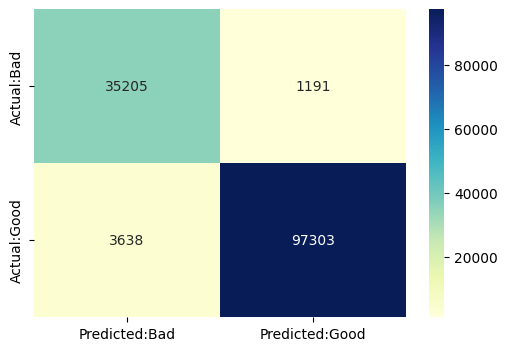

In [35]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

MultinomialNB 

In [36]:
# create mnb object
mnb = MultinomialNB()

In [37]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [38]:
mnb.score(testX,testY)

0.9578409314314423

In [39]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.973794325380452
Testing Accuracy : 0.9578409314314423

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     37901
        Good       0.98      0.97      0.97     99436

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

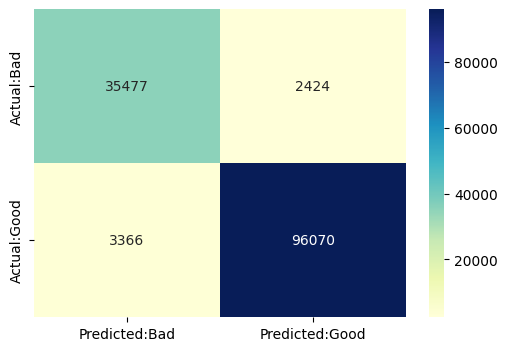

In [40]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [41]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+)  -- these tolenizers giving me low accuray 

In [42]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [43]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [44]:
pipeline_ls.score(testX,testY)

0.966316433299111

Training Accuracy : 0.980745612970559
Testing Accuracy : 0.966316433299111

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     37078
        Good       0.99      0.97      0.98    100259

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

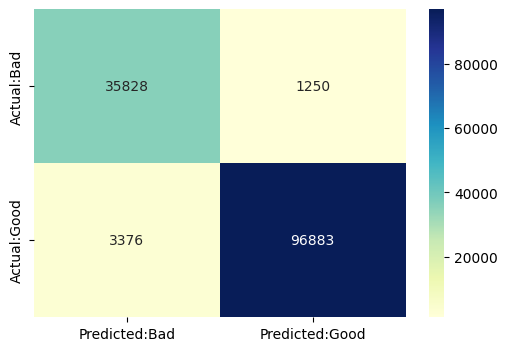

In [45]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [46]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [47]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.966316433299111


In [48]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
               'fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe',
               'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU',
                'retailhellunderground.com/',
                'restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
